# Setup

In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import scipy
import warnings
import csv
warnings.filterwarnings('ignore')

# configure plotting
rc('text', usetex=True)
plt.rc('font', family='serif')
%config InlineBackend.rc = {'figure.dpi': 300, 'savefig.dpi': 300, \
                            'font.size': 30, \
                            'figure.facecolor': (1, 1, 1, 0)}

%matplotlib inline

In [2]:
%load_ext autoreload
%aimport networks
from networks import RWGraph
%aimport log_bin
# helper functions
%aimport utils
font_size = 20
%autoreload 1

# Fixed N varying m (L = 1)

In [3]:
repeats = 100
# load the data
n = 10**5
M = [1, 2, 4, 8, 16]

In [4]:
raw_data = []
for m in M:
    print(m)
    data = []
    for i in range(1, repeats):
        degrees = RWGraph.load_degrees(n, m, folder='deg_dist' + str(i), root_folder='rw1')
        data.append(list(degrees.values()))
    raw_data.append(data)

1
2
4
8
16


In [5]:
raw_data = np.array(raw_data)

In [6]:
fixed_n_degrees = utils.convert_raw_to_deg_dist(raw_data, M)
for col in fixed_n_degrees:
    total = fixed_n_degrees[col].dropna().sum()
    fixed_n_degrees[col] = fixed_n_degrees[col] / total

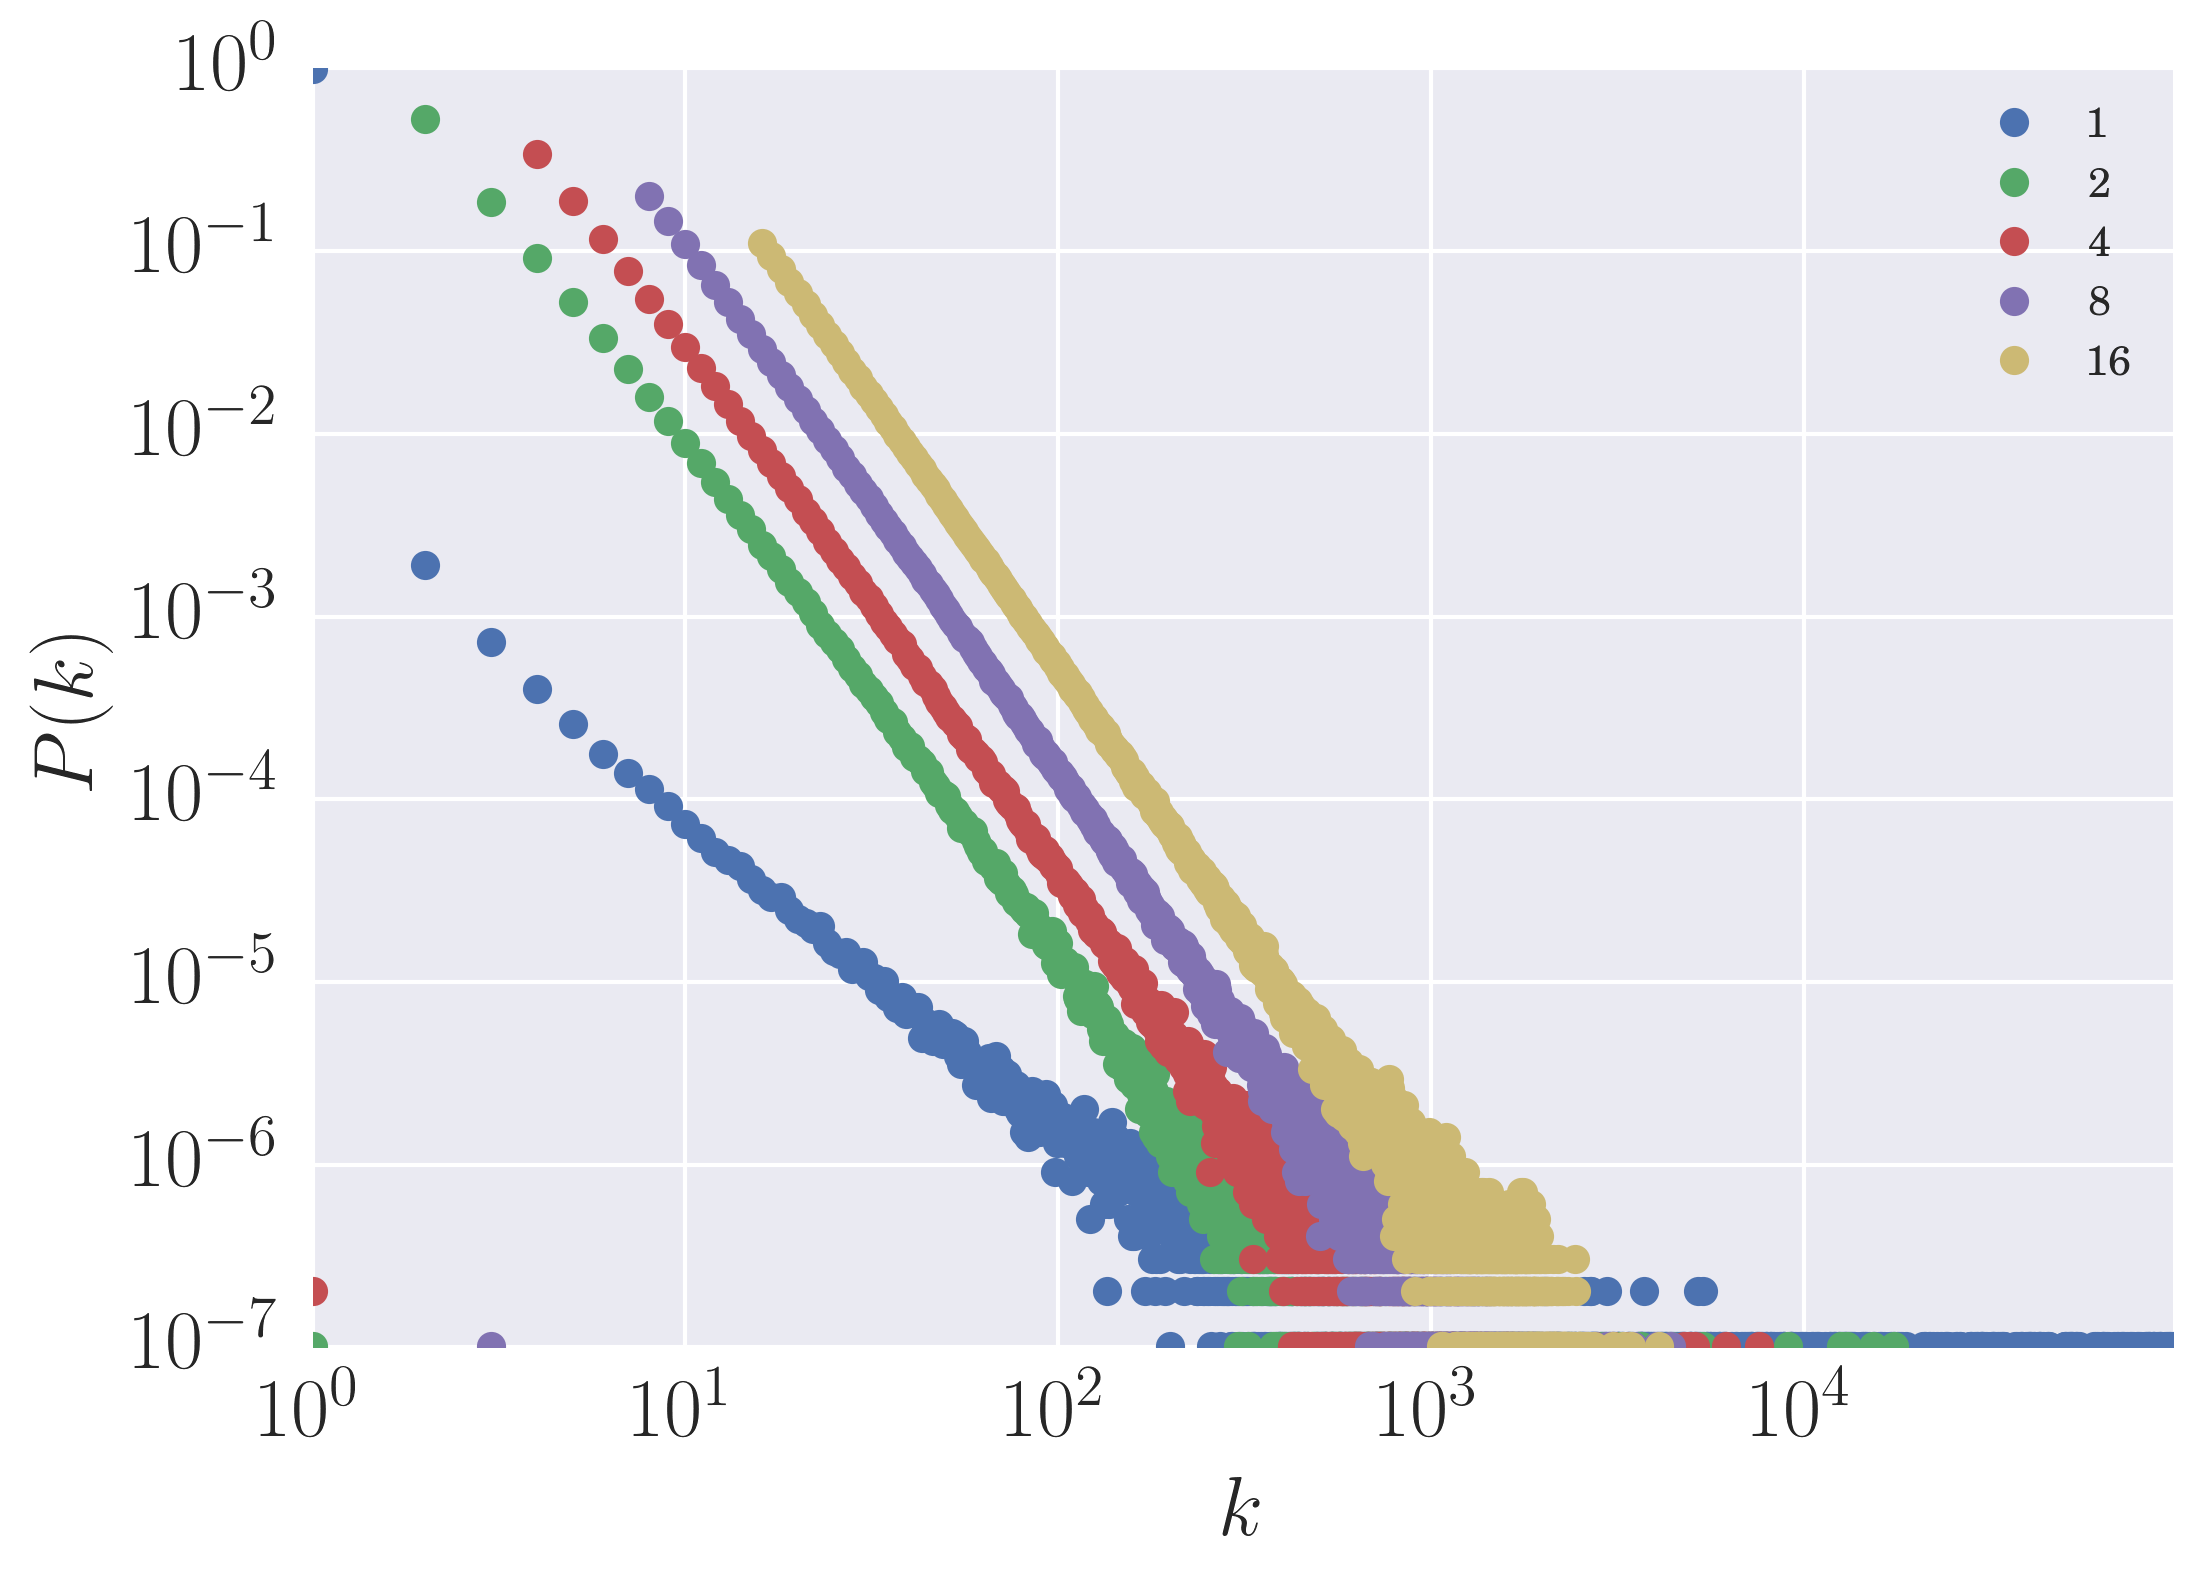

In [7]:
fixed_n_degrees.plot(style='o', loglog=True, fontsize=font_size)
ax = plt.gca()
ax.set_ylabel(u'$P(k)$', fontsize=font_size)
ax.set_xlabel(u'$k$', fontsize=font_size)

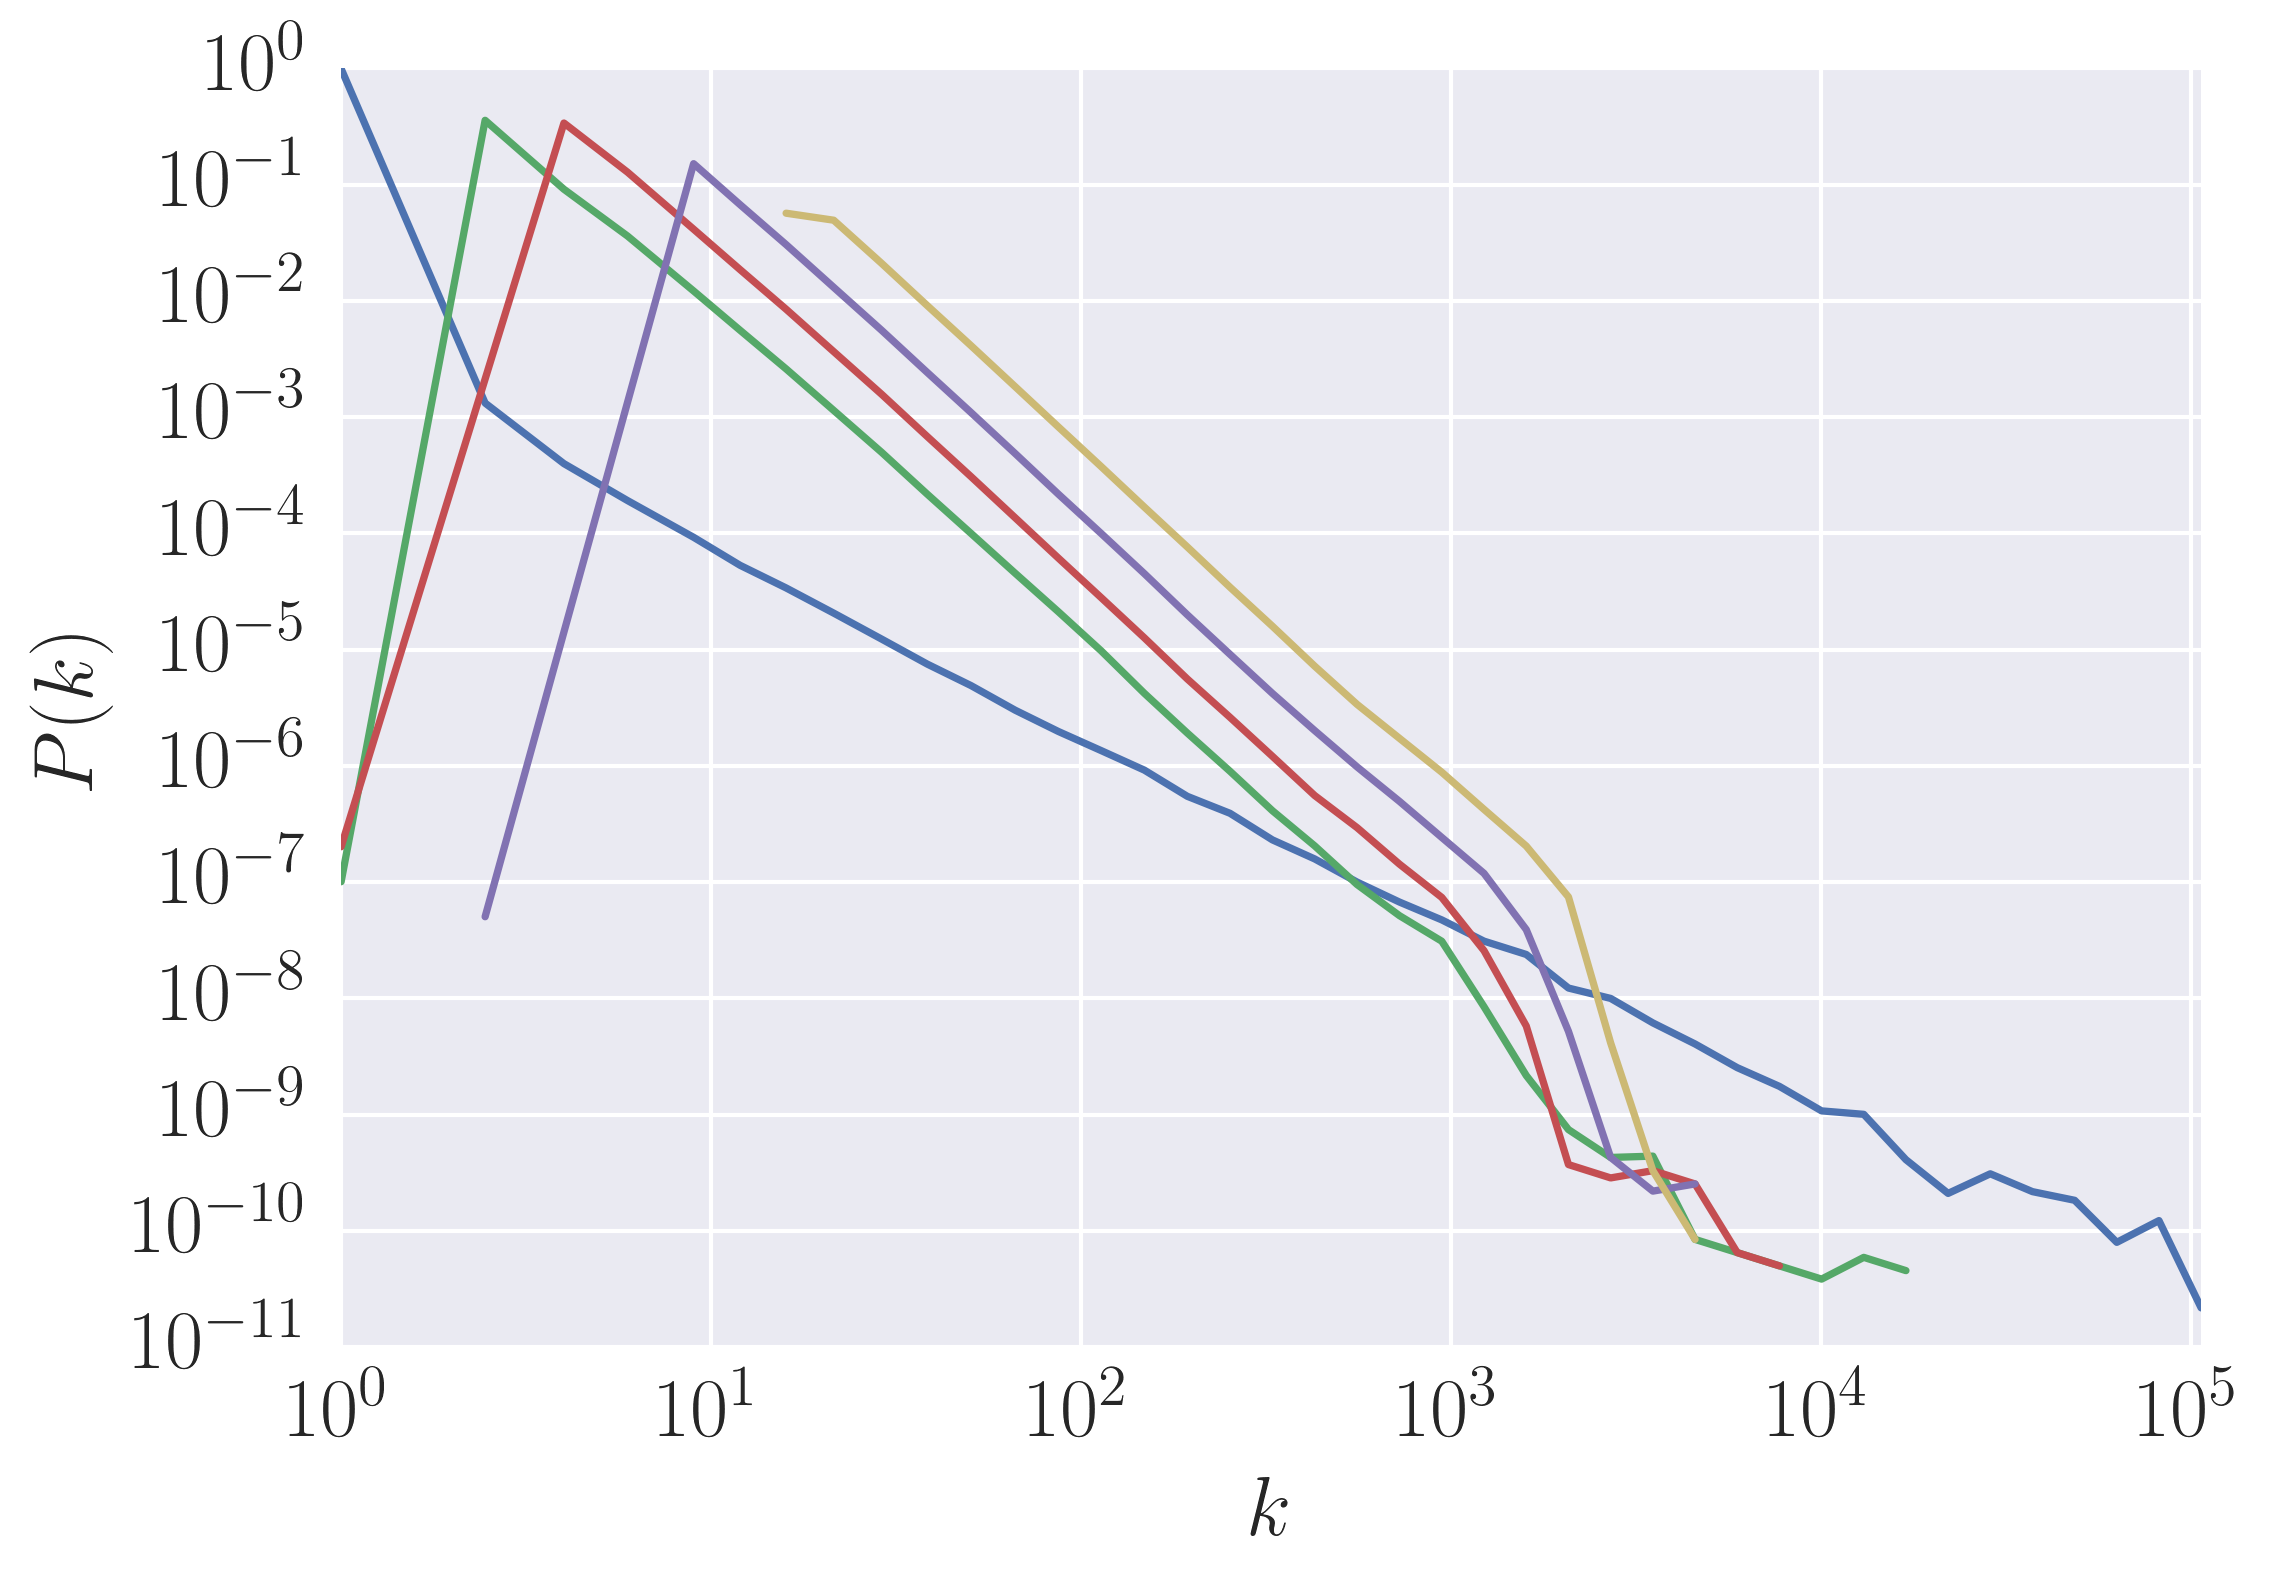

In [8]:
fixed_n_logbin = utils.log_bin_freq_and_plot(fixed_n_degrees, a=1.3, font_size=font_size, style='-', loglog=True)

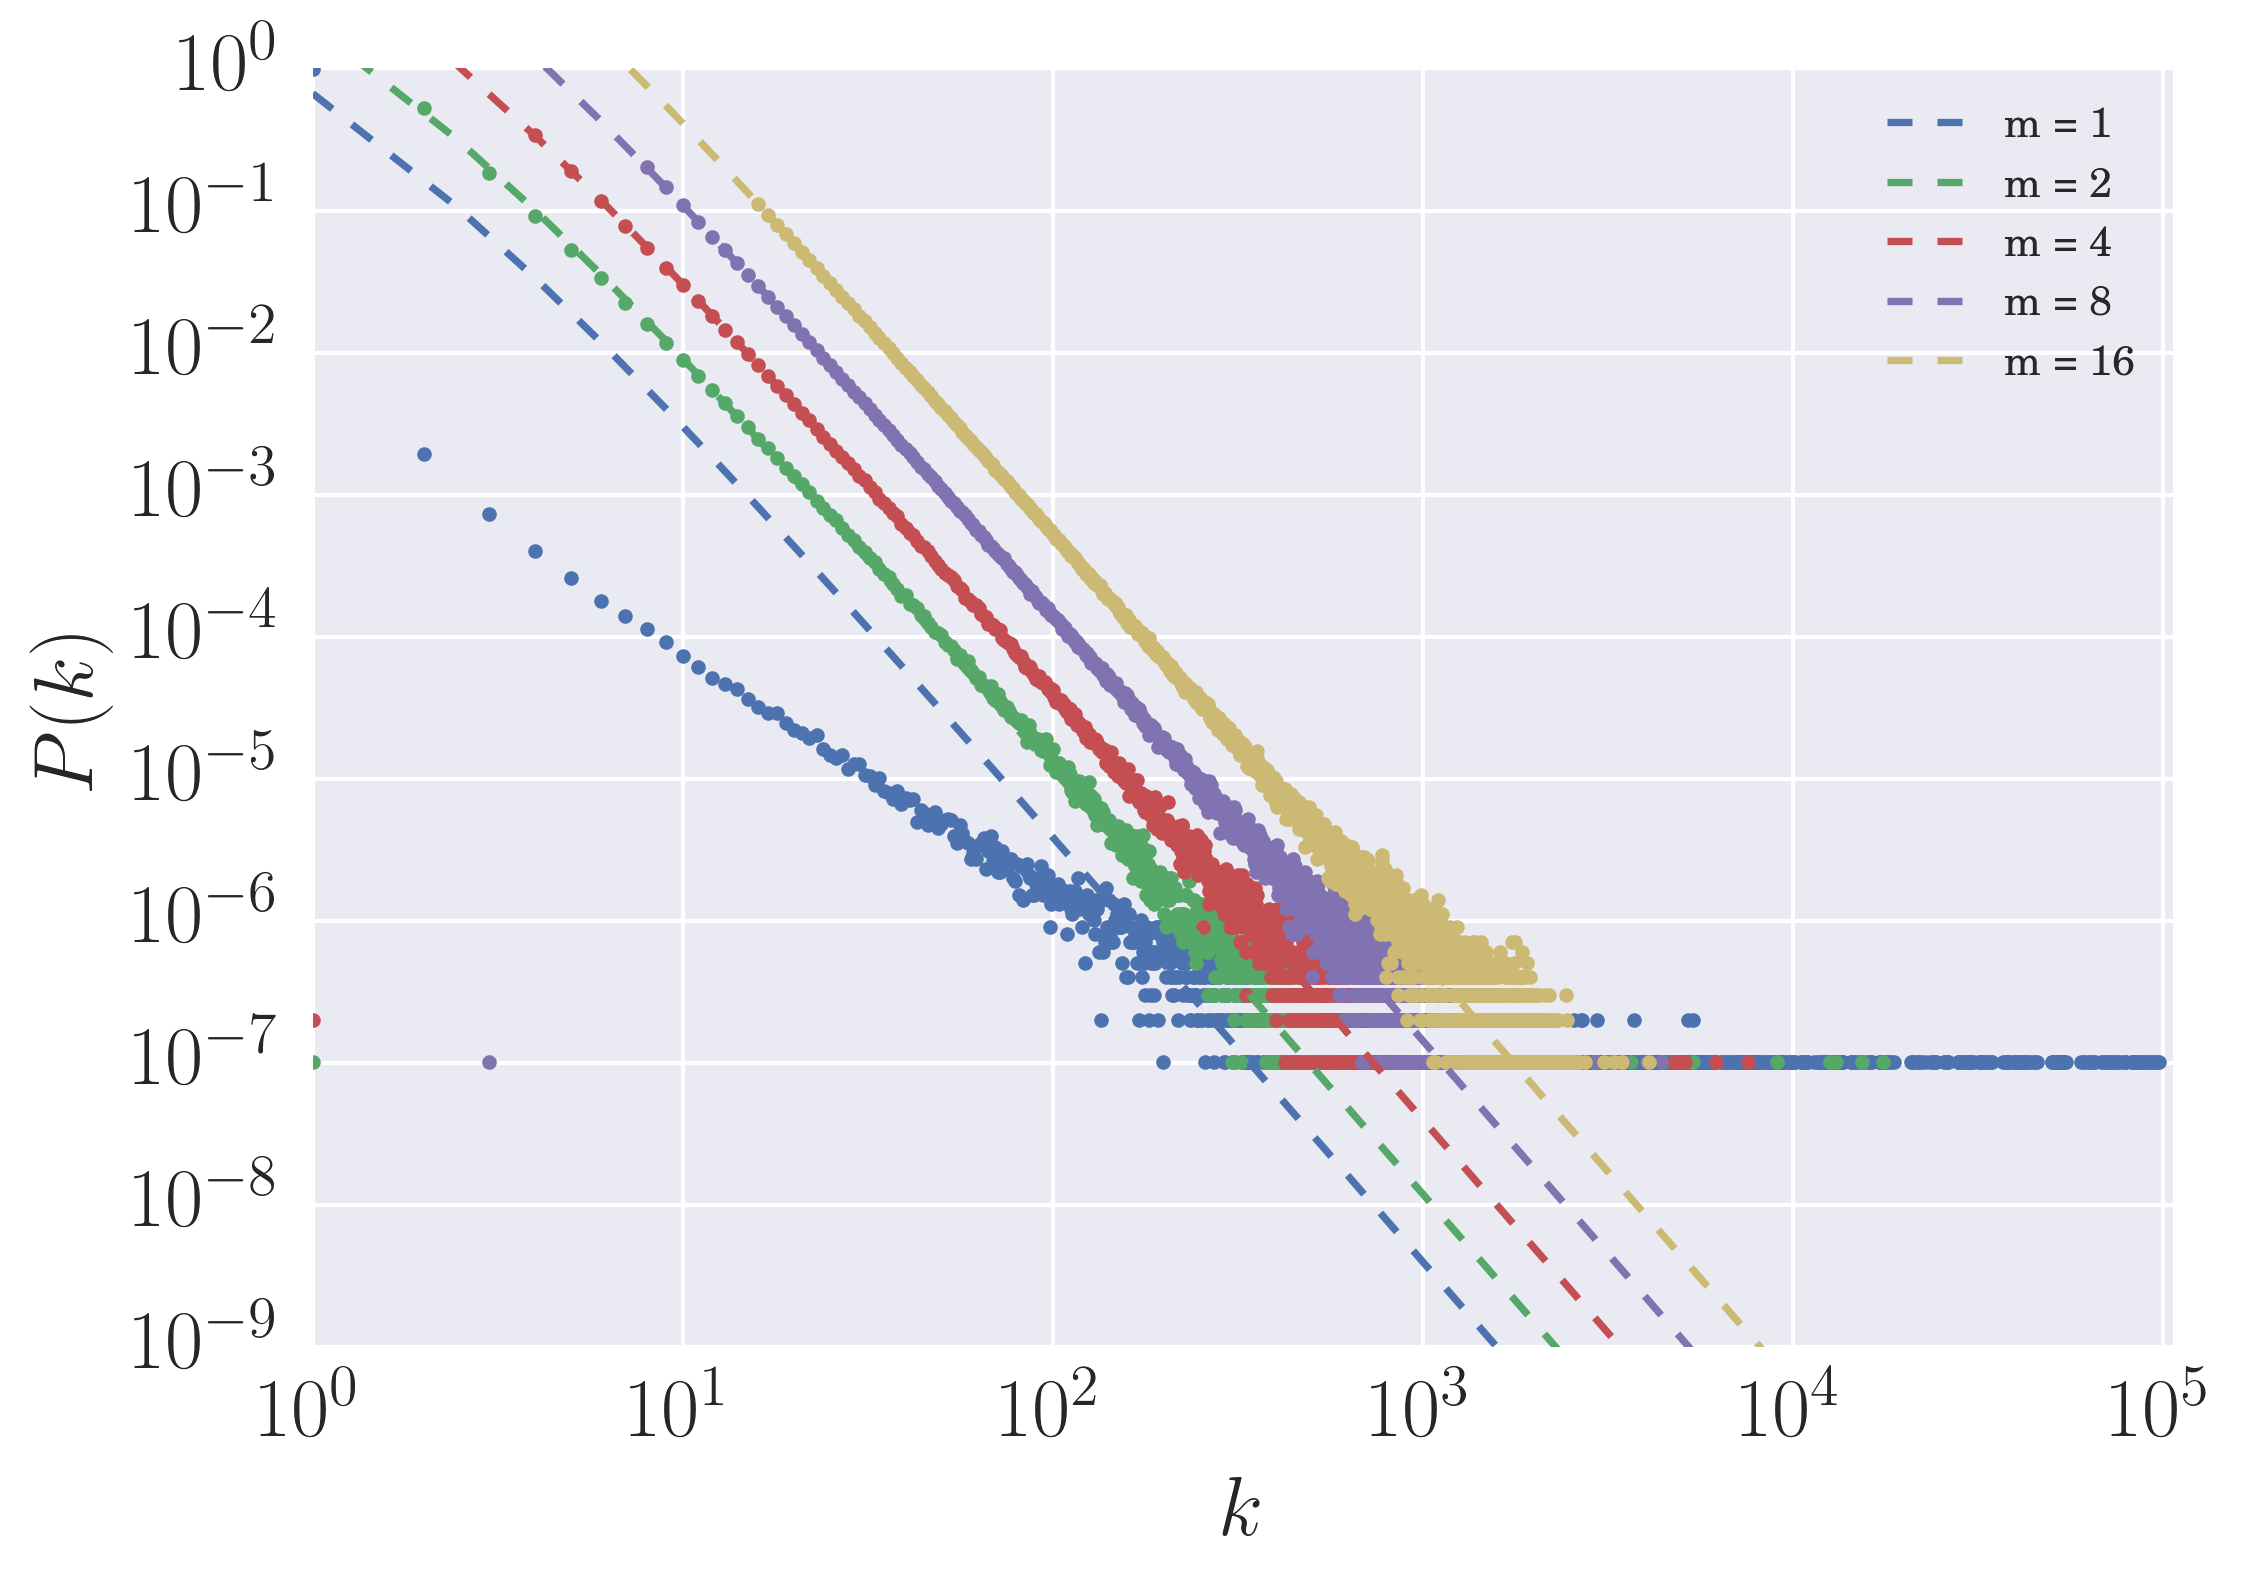

In [9]:
# plot numerical results
fixed_n_degrees.plot(style='.', loglog=True, label='__nolegend__', legend=False, fontsize=font_size)

# plot model
result = utils.get_model_df(fixed_n_logbin, fixed_n_logbin.columns)
current_palette = sns.color_palette()
for i, col in enumerate(result):
    result[col].dropna().plot(loglog=True, fontsize=font_size, style='--', color=current_palette[i], label='m = '+str(col), ylim=(1e-9, 1))
# plt.legend()
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[5:], labels[5:])
ax.set_ylabel(u'$P(k)$', fontsize=font_size)
ax.set_xlabel(u'$k$', fontsize=font_size)

## Compare with synthetic data

In [10]:
# synthetic datasets
folder = "data/ba/synthetic"
synthetic = []
for m in M:
    data = []
    for i in range(25):
        fn = "{0}/{1}_{2}_{3}.csv".format(folder, n, m, i)
        with open(fn, 'r') as f:
            reader = csv.reader(f)
            data_as_list = list(reader)
        x = data_as_list[0]
        x = [int(i) for i in x[:-1]]
        data.append(x)
    synthetic.append(data)
synthetic_degrees = np.array(synthetic)

In [11]:
for i, d in enumerate(raw_data):
    reference = synthetic_degrees[i][0]
    ks, raw_p = scipy.stats.ks_2samp(d[0], reference)
    print(ks)

0.33022
0.41147
0.26048
0.10984
0.05014


In [12]:
# pd.DataFrame(plist_all, index=M).T.to_csv('data/rw1/ks_test.csv')

In [13]:
plist_df = pd.read_csv('data/rw1/ks_test.csv', index_col=0)

In [14]:
plist_df.mean()

1     0.000000
2     0.000000
4     0.028687
8     0.768485
16    0.648081
dtype: float64

# Fixed N varying m (L = 5)

# Fixed N, fixed m, varying L

In [15]:
n = 10**5
m = 8
L = [1, 2, 3, 4, 5, 6, 7, 8]

In [16]:
raw_data_diff_L = []
for l in L:
    print(l)
    for i in range(1, 10):
        degrees = RWGraph.load_degrees(n, m, folder='deg_dist' + str(i), root_folder='rw' + str(l))
        data.append(list(degrees.values()))
    raw_data_diff_L.append(data)

1
2
3
4
5
6
7
8


In [17]:
raw_data_diff_L = np.array(raw_data_diff_L)

In [18]:
diff_l_degrees = utils.convert_raw_to_deg_dist(raw_data_diff_L, L)
for col in diff_l_degrees:
    total = diff_l_degrees[col].dropna().sum()
    diff_l_degrees[col] = diff_l_degrees[col] / total

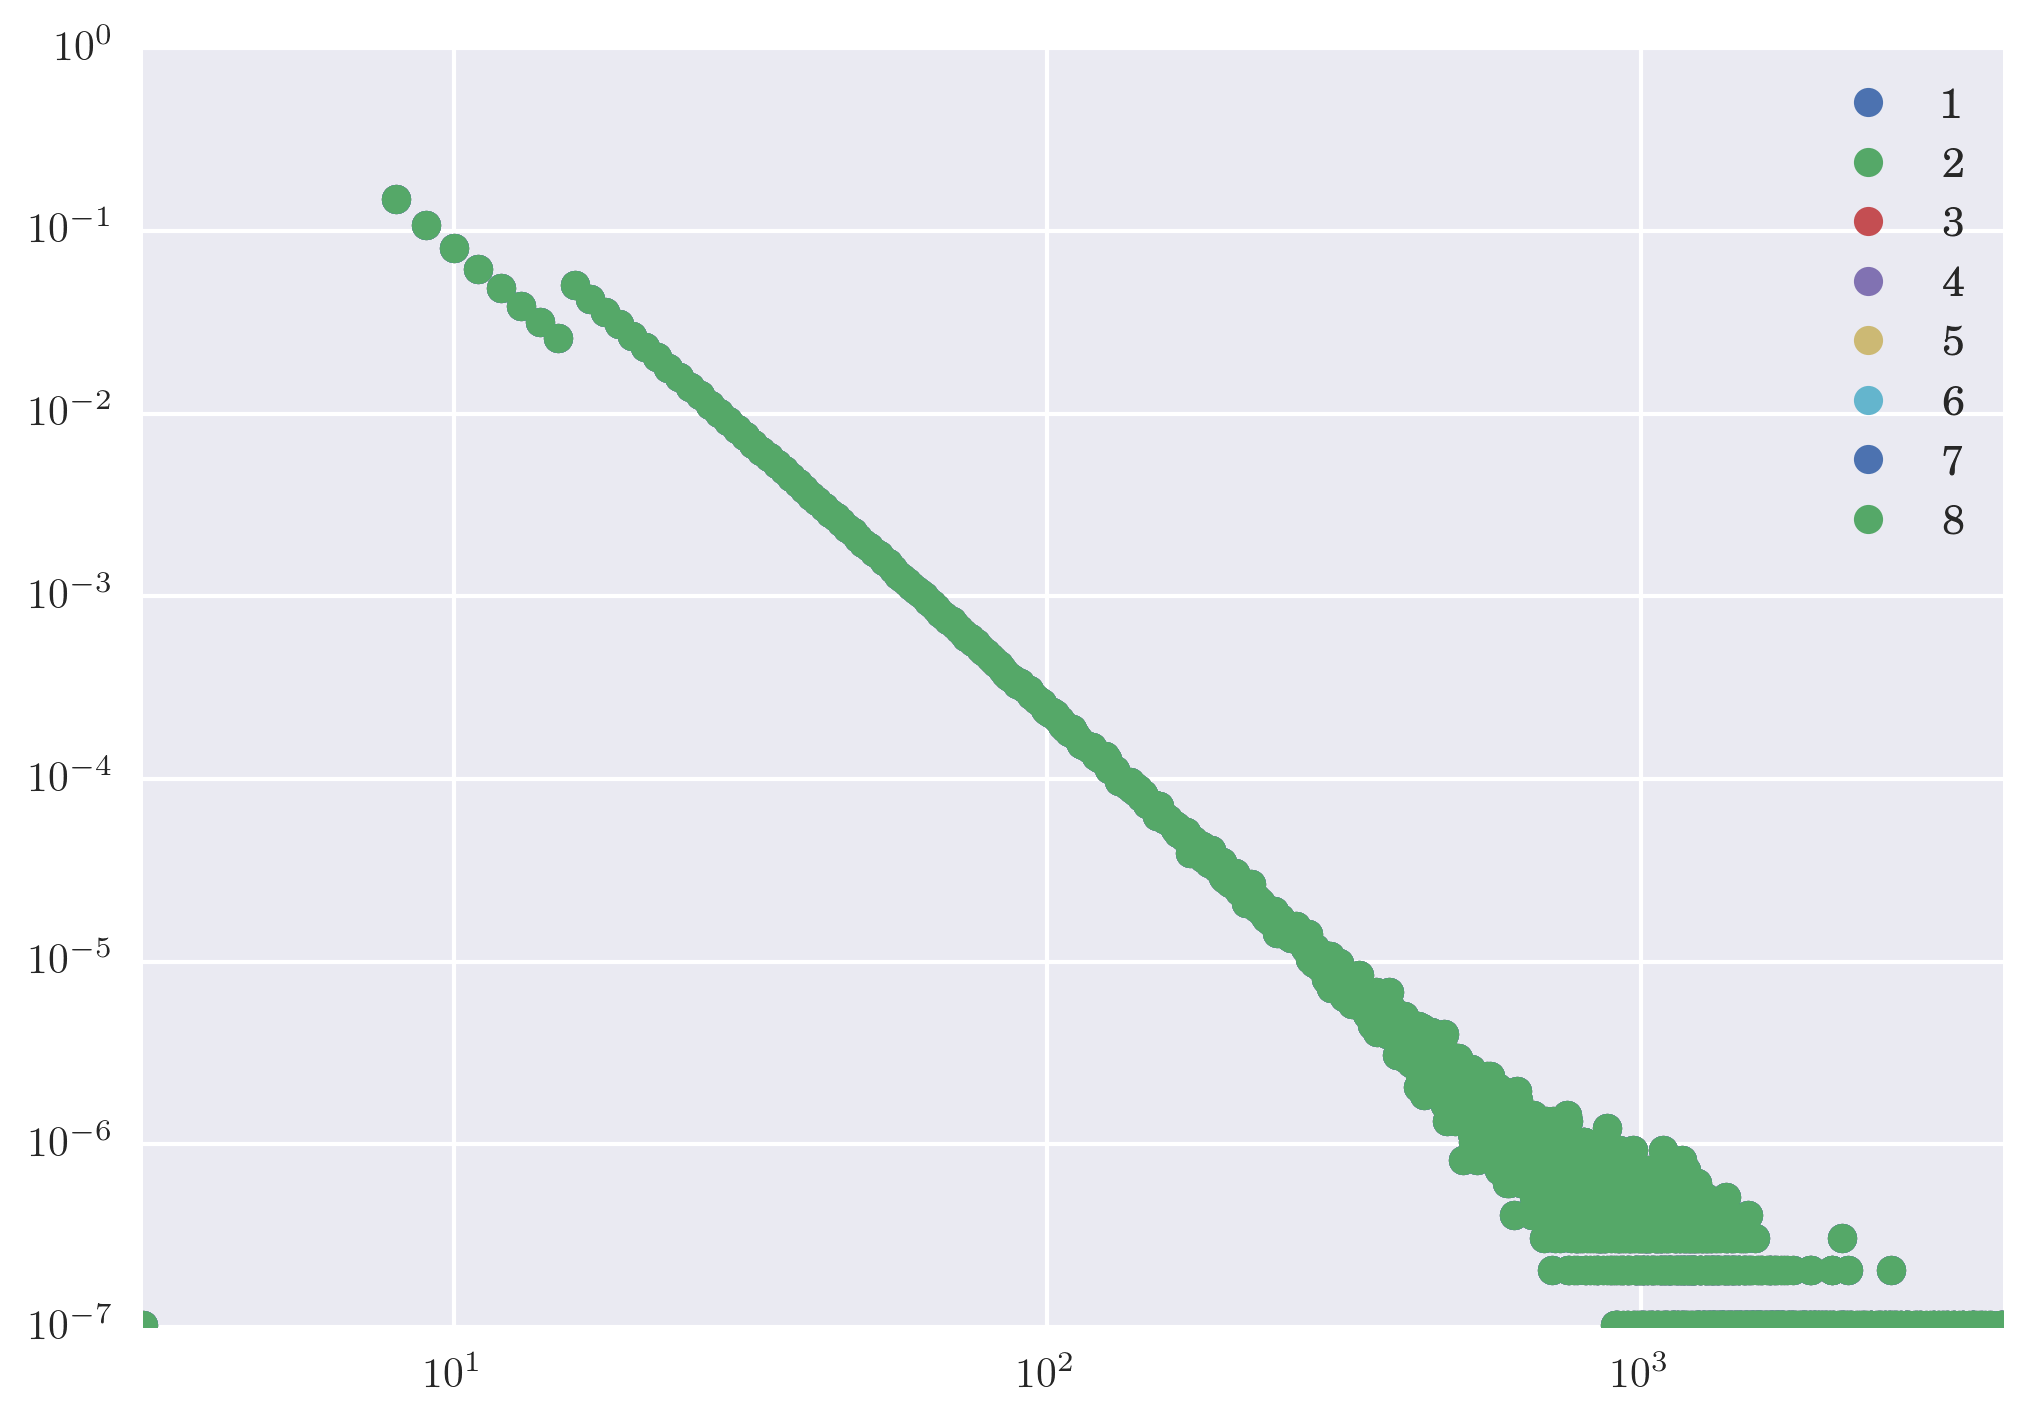

In [19]:
diff_l_degrees.plot(style='o', loglog=True)

In [20]:
reference_diff_l = synthetic_degrees[3][0]
for i, d in enumerate(raw_data_diff_L):
    ks, raw_p = scipy.stats.ks_2samp(d[0], reference_diff_l)
    print(ks)

0.73479
0.73479
0.73479
0.73479
0.73479
0.73479
0.73479
0.73479


In [21]:
plist_all_diff_l = []
total_counts = len(synthetic_degrees[3])
reference_diff_l = synthetic_degrees[3][0]

synthetic_ks_list = []
for index in range(len(synthetic[3])):
    synthetic_ks, synthetic_raw_p = scipy.stats.ks_2samp(synthetic[3][index], reference)
    synthetic_ks_list.append(synthetic_ks)
synthetic_ks_list = np.array(synthetic_ks_list)

for i, d in enumerate(raw_data_diff_L):
    plist_diff_l = []
    for repeat in range(1, 10):
        ks, raw_p = scipy.stats.ks_2samp(d[repeat], reference_diff_l)
        p = (synthetic_ks_list > ks).sum() / total_counts
        plist_diff_l.append(p)
    plist_all_diff_l.append(plist_diff_l)

In [22]:
plist_diff_L_df = pd.DataFrame(plist_all_diff_l, index=L).T

In [23]:
plist_diff_L_df.mean()

1    0.64
2    0.64
3    0.64
4    0.64
5    0.64
6    0.64
7    0.64
8    0.64
dtype: float64